In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

# problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
df=pd.read_csv('Wholesale+Customers+Data.csv')
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
df.isnull().values.any()

False

In [5]:
print("rows",df.shape[0],"columns",df.shape[1])

rows 440 columns 9


In [6]:
print("Total number of elements of dataset =",df.shape[0]*df.shape[1])

Total number of elements of dataset = 3960


In [7]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.describe(include='object')

,Channel,Region
count,440,440
unique,2,3
top,Hotel,Other
freq,298,316


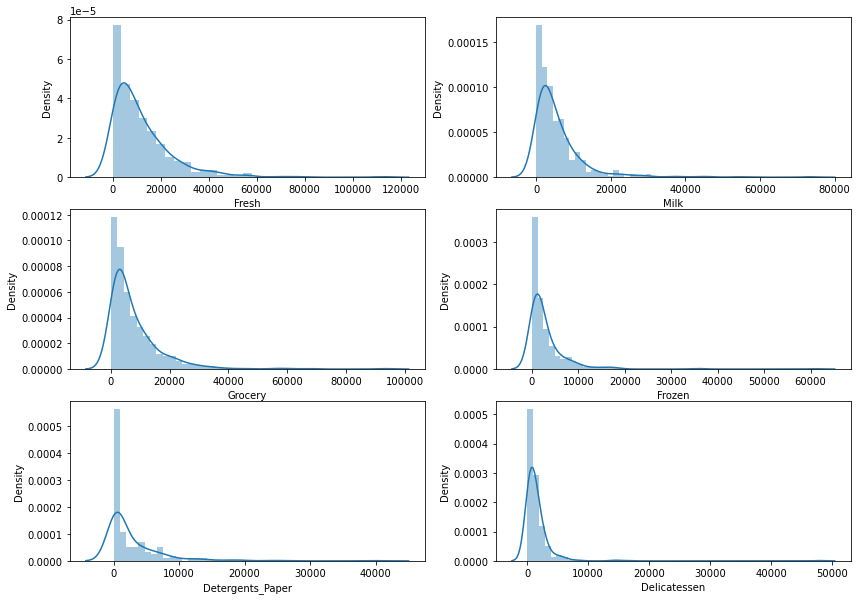

In [9]:
feature=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.figure(figsize=(14,10))
for i in feature:
    plt.subplot(3,2,feature.index(i)+1)
    sns.distplot(df[i])

In [10]:
df[feature].skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

<AxesSubplot:>

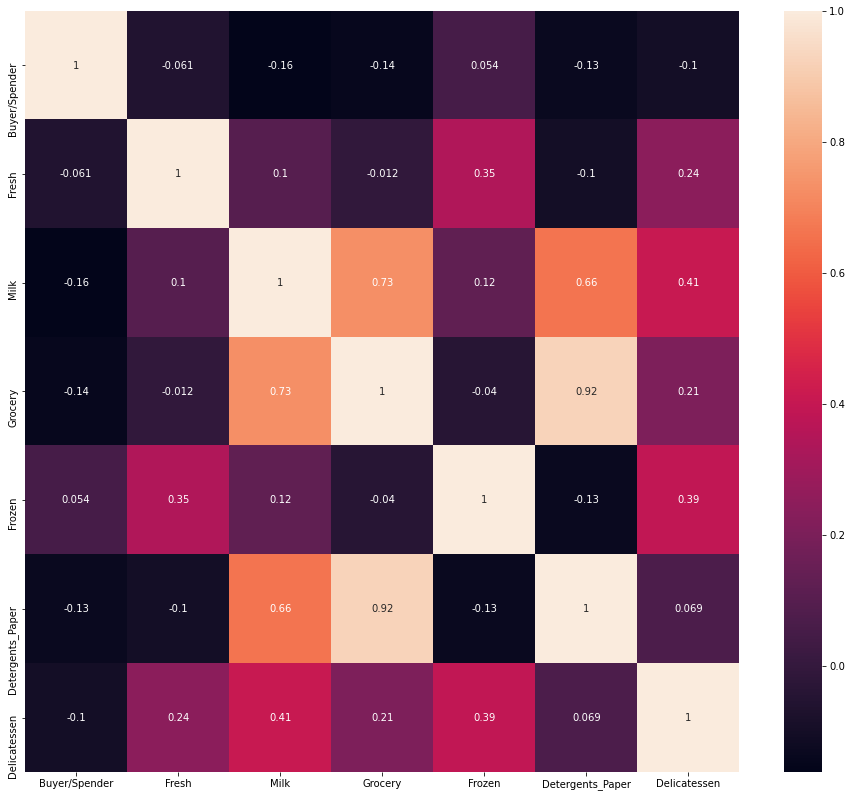

In [11]:
plt.figure(figsize=(16,14),)
sns.heatmap(df.corr(), annot=True)

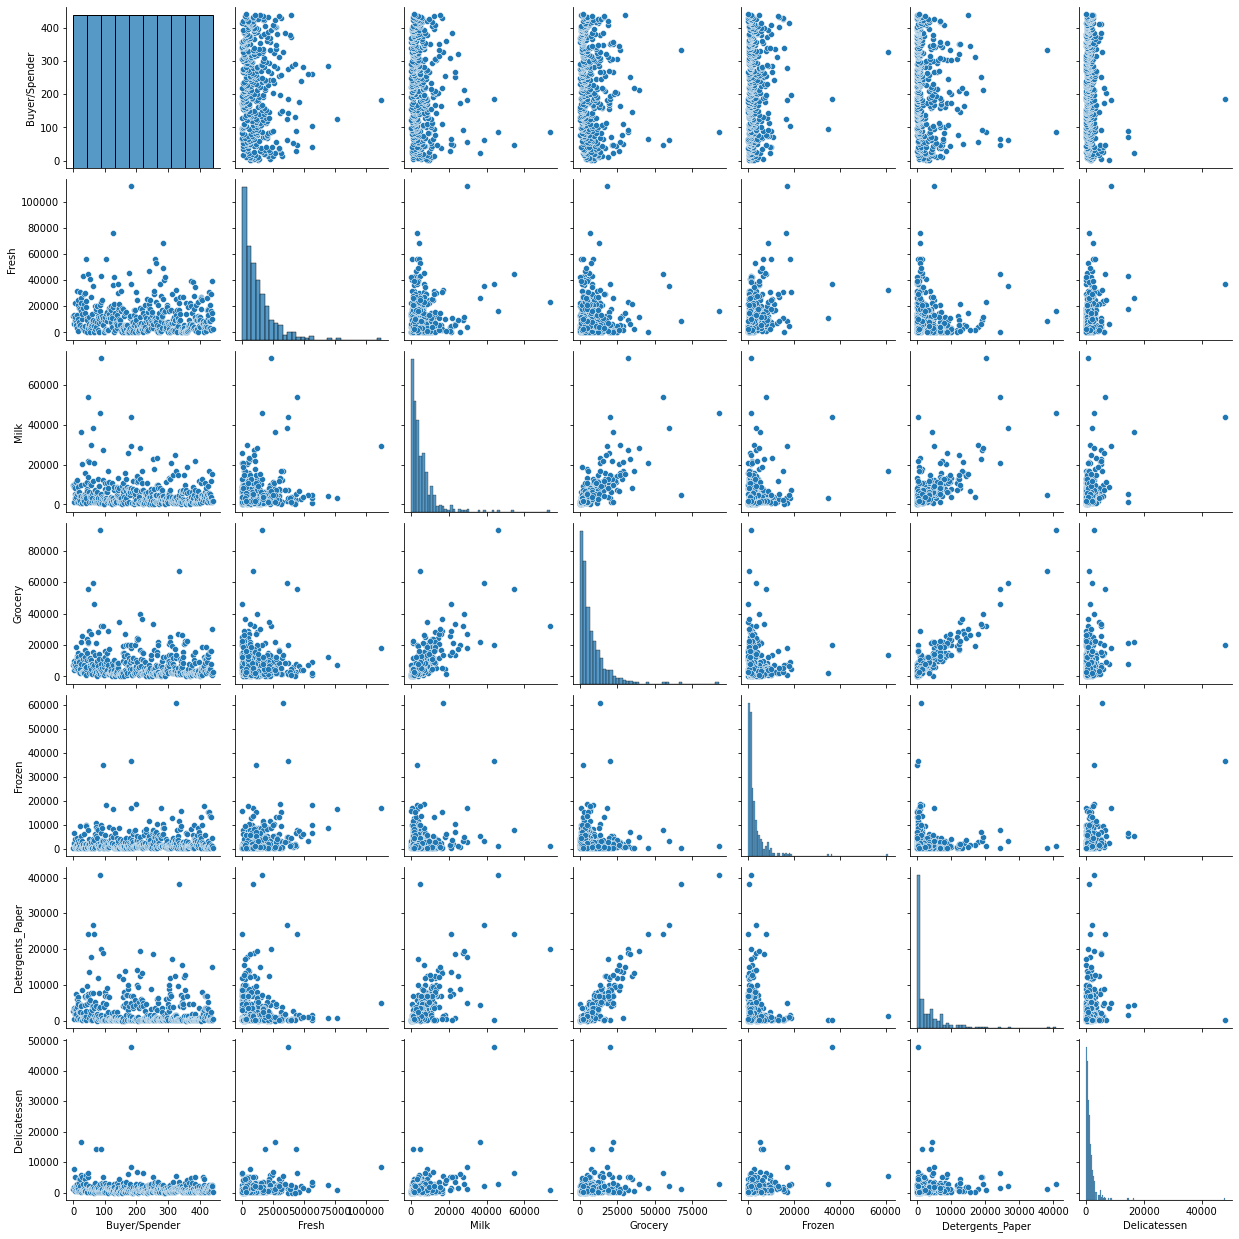

In [12]:
sns.pairplot(df)

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most?
Which Region and which Channel spent the least?

In [13]:
Region_data=df.groupby('Region').sum()
Region_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1).sort_values(ascending=False)

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
dtype: int64

<AxesSubplot:xlabel='Region'>

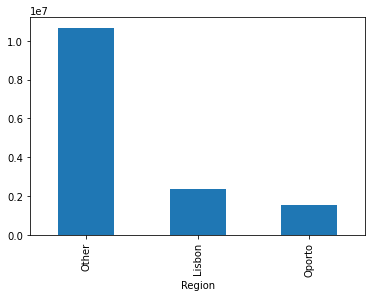

In [14]:
Region_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1).sort_values(ascending=False).plot(kind="bar")

In [15]:
Channel_data=df.groupby('Channel').sum()
Channel_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1).sort_values(ascending=False)

Channel
Hotel     7999569
Retail    6619931
dtype: int64

<AxesSubplot:xlabel='Channel'>

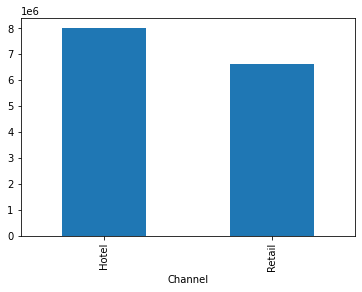

In [16]:
Channel_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1).sort_values(ascending=False).plot(kind="bar")

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel?
Provide a detailed justification for your answer.

In [17]:
df_des=df.groupby('Channel').describe()['Fresh'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,13475.560403,8904.323944
std,13831.687502,8987.714750
min,3.000000,18.000000
25%,4070.250000,2347.750000
50%,9581.500000,5993.500000
75%,18274.750000,12229.750000
max,112151.000000,44466.000000
CV,1.026428,1.009365


<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

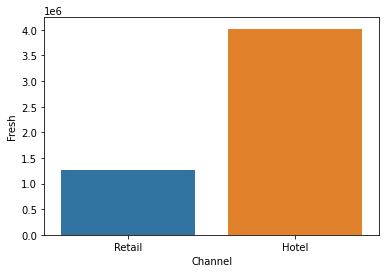

In [18]:
sns.barplot(x='Channel',y='Fresh',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

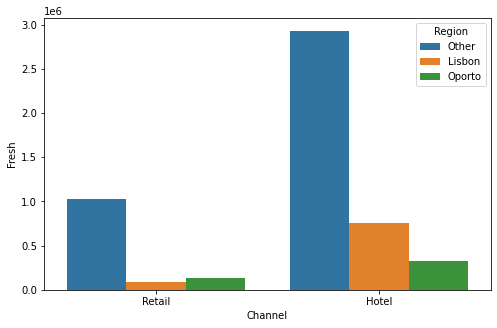

In [19]:
plt.figure(figsize=(8,5));
sns.barplot(x='Channel',y='Fresh',hue='Region',ci=False,estimator=sum,data=df)

In [20]:
df_des=df.groupby('Channel').describe()['Milk'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des


Channel,Hotel,Retail
count,298.000000,142.000000
mean,3451.724832,10716.500000
std,4352.165571,9679.631351
min,55.000000,928.000000
25%,1164.500000,5938.000000
50%,2157.000000,7812.000000
75%,4029.500000,12162.750000
max,43950.000000,73498.000000
CV,1.260867,0.903246


<AxesSubplot:xlabel='Channel', ylabel='Milk'>

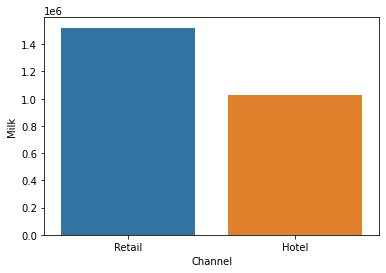

In [21]:
sns.barplot(x='Channel',y='Milk',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

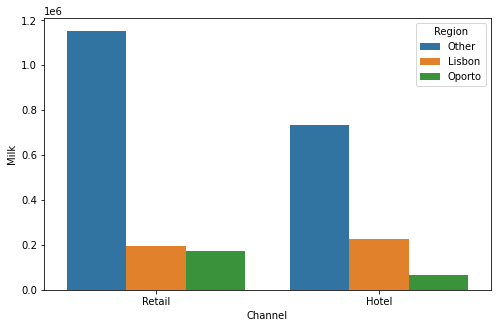

In [22]:
plt.figure(figsize=(8,5));
sns.barplot(x='Channel',y='Milk',hue='Region',ci=False,estimator=sum,data=df)

In [23]:
df_des=df.groupby('Channel').describe()['Grocery'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,3962.137584,16322.852113
std,3545.513391,12267.318094
min,3.000000,2743.000000
25%,1703.750000,9245.250000
50%,2684.000000,12390.000000
75%,5076.750000,20183.500000
max,21042.000000,92780.000000
CV,0.894849,0.751543


<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

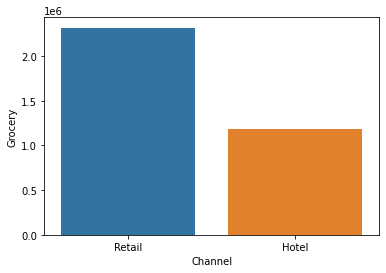

In [24]:
sns.barplot(x='Channel',y='Grocery',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

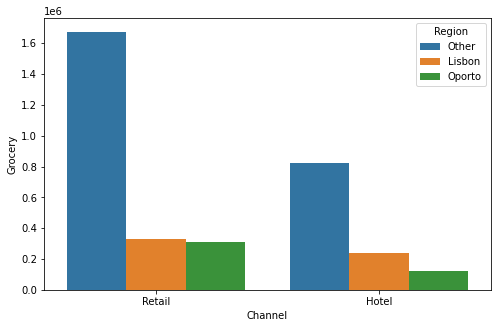

In [25]:
plt.figure(figsize=(8,5));
sns.barplot(x='Channel',y='Grocery',hue='Region',ci=False,estimator=sum,data=df)

In [26]:
df_des=df.groupby('Channel').describe()['Frozen'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,3748.251678,1652.612676
std,5643.912500,1812.803662
min,25.000000,33.000000
25%,830.000000,534.250000
50%,2057.500000,1081.000000
75%,4558.750000,2146.750000
max,60869.000000,11559.000000
CV,1.505745,1.096932


<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

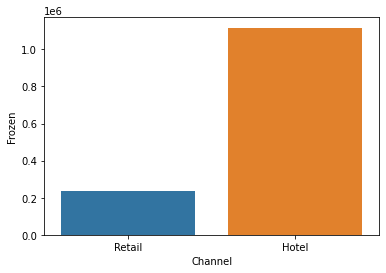

In [27]:
sns.barplot(x='Channel',y='Frozen',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

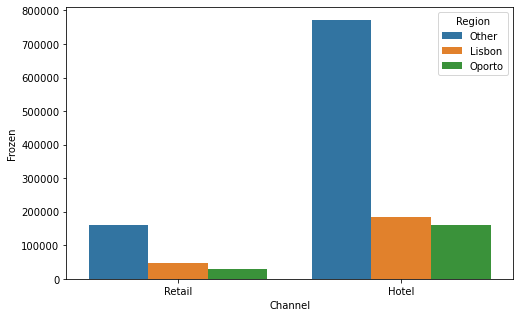

In [28]:
plt.figure(figsize=(8,5));
sns.barplot(x='Channel',y='Frozen',hue='Region',ci=False,estimator=sum,data=df)

In [29]:
df_des=df.groupby('Channel').describe()['Detergents_Paper'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,790.560403,7269.507042
std,1104.093673,6291.089697
min,3.000000,332.000000
25%,183.250000,3683.500000
50%,385.500000,5614.500000
75%,899.500000,8662.500000
max,6907.000000,40827.000000
CV,1.396596,0.865408


<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

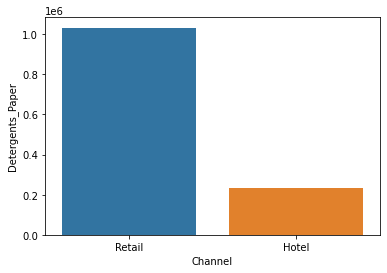

In [30]:
sns.barplot(x='Channel',y='Detergents_Paper',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

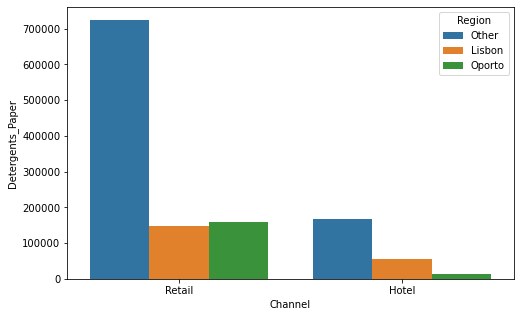

In [31]:
plt.figure(figsize=(8,5));
sns.barplot(x='Channel',y='Detergents_Paper',hue='Region',ci=False,estimator=sum,data=df)

In [32]:
df_des=df.groupby('Channel').describe()['Delicatessen'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,1415.956376,1753.436620
std,3147.426922,1953.797047
min,3.000000,3.000000
25%,379.000000,566.750000
50%,821.000000,1350.000000
75%,1548.000000,2156.000000
max,47943.000000,16523.000000
CV,2.222828,1.114267


<AxesSubplot:xlabel='Channel', ylabel='Delicatessen'>

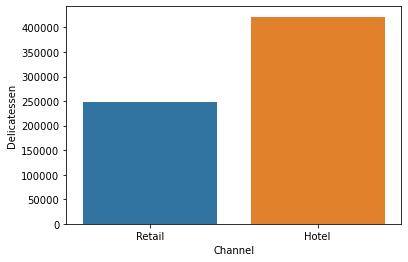

In [33]:
sns.barplot(x='Channel',y='Delicatessen',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Channel', ylabel='Delicatessen'>

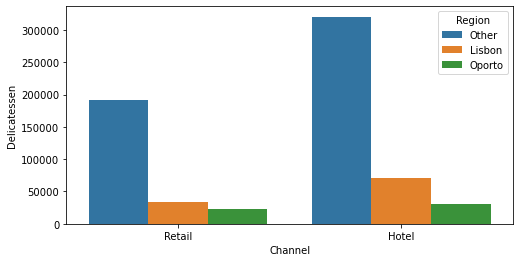

In [34]:
    plt.figure(figsize=(8,4));
    sns.barplot(x='Channel',y='Delicatessen',hue='Region',ci=False,estimator=sum,data=df)

In [35]:
df_des=df.groupby('Region').describe()['Fresh'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,11101.727273,9887.680851,12533.471519
std,11557.438575,8387.899211,13389.213115
min,18.000000,3.000000,3.000000
25%,2806.000000,2751.500000,3350.750000
50%,7363.000000,8090.000000,8752.500000
75%,15218.000000,14925.500000,17406.500000
max,56083.000000,32717.000000,112151.000000
CV,1.041049,0.848318,1.068277


<AxesSubplot:xlabel='Region', ylabel='Fresh'>

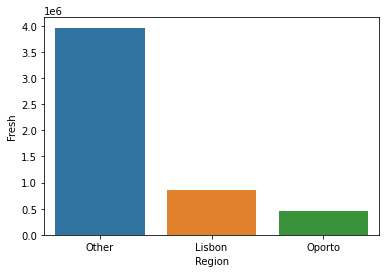

In [36]:
sns.barplot(x='Region',y='Fresh',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

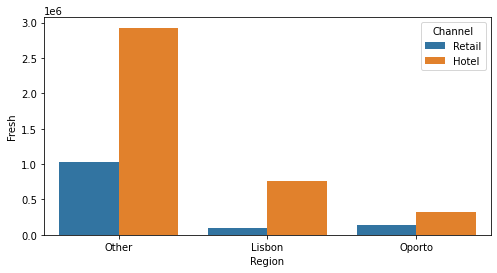

In [37]:
plt.figure(figsize=(8,4));
sns.barplot(x='Region',y='Fresh',hue='Channel',ci=False,estimator=sum,data=df)

In [38]:
df_des=df.groupby('Region').describe()['Milk'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,5486.415584,5088.170213,5977.085443
std,5704.856079,5826.343145,7935.463443
min,258.000000,333.000000,55.000000
25%,1372.000000,1430.500000,1634.000000
50%,3748.000000,2374.000000,3684.500000
75%,7503.000000,5772.500000,7198.750000
max,28326.000000,25071.000000,73498.000000
CV,1.039815,1.145076,1.327648


<AxesSubplot:xlabel='Region', ylabel='Milk'>

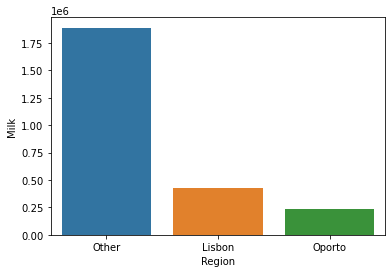

In [39]:
sns.barplot(x='Region',y='Milk',ci=False,estimator=sum,data=df)

<AxesSubplot:xlabel='Region', ylabel='Milk'>

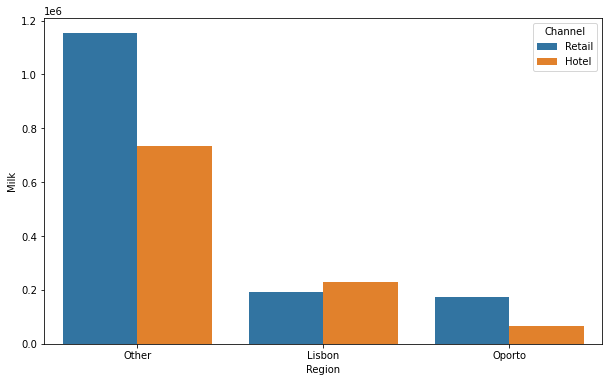

In [40]:
plt.figure(figsize=(10,6));
sns.barplot(x='Region',y='Milk',hue='Channel',ci=False,estimator=sum,data=df)

In [41]:
df_des=df.groupby('Region').describe()['Grocery'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des


Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,7403.077922,9218.595745,7896.363924
std,8496.287728,10842.745314,9537.287778
min,489.000000,1330.000000,3.000000
25%,2046.000000,2792.500000,2141.500000
50%,3838.000000,6114.000000,4732.000000
75%,9490.000000,11758.500000,10559.750000
max,39694.000000,67298.000000,92780.000000
CV,1.147670,1.176182,1.207808


<AxesSubplot:xlabel='Region', ylabel='Grocery'>

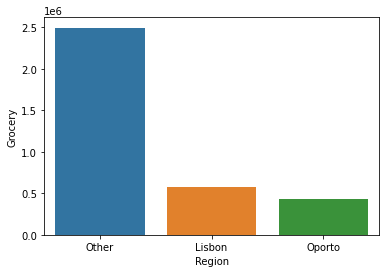

In [42]:
sns.barplot(x='Region',y='Grocery',ci=False,estimator=sum,data=df)


<AxesSubplot:xlabel='Region', ylabel='Grocery'>

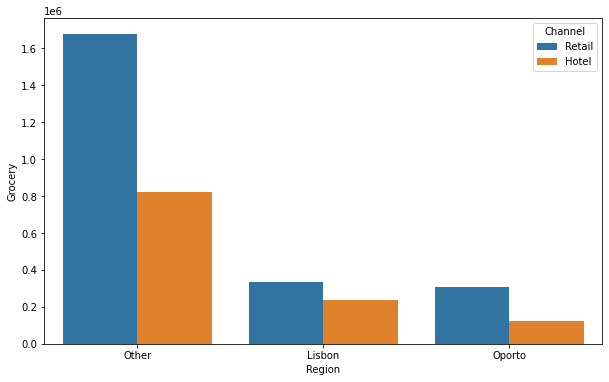

In [43]:
plt.figure(figsize=(10,6));
sns.barplot(x='Region',y='Grocery',hue='Channel',ci=False,estimator=sum,data=df)

In [44]:
df_des=df.groupby('Region').describe()['Frozen'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des


Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,3000.337662,4045.361702,2944.594937
std,3092.143894,9151.784954,4260.126243
min,61.000000,131.000000,25.000000
25%,950.000000,811.500000,664.750000
50%,1801.000000,1455.000000,1498.000000
75%,4324.000000,3272.000000,3354.750000
max,18711.000000,60869.000000,36534.000000
CV,1.030599,2.262291,1.446761


<AxesSubplot:xlabel='Region', ylabel='Frozen'>

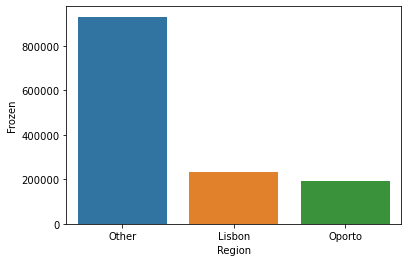

In [45]:

sns.barplot(x='Region',y='Frozen',ci=False,estimator=sum,data=df)


<AxesSubplot:xlabel='Region', ylabel='Frozen'>

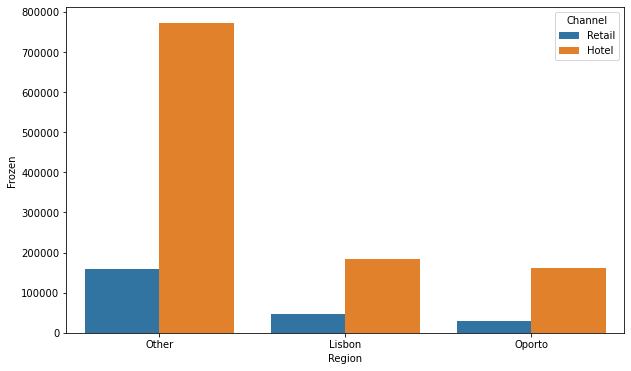

In [46]:
plt.figure(figsize=(10,6));
sns.barplot(x='Region',y='Frozen',hue='Channel',ci=False,estimator=sum,data=df)

In [47]:
df_des=df.groupby('Region').describe()['Detergents_Paper'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,2651.116883,3687.468085,2817.753165
std,4208.462708,6514.717668,4593.051613
min,5.000000,15.000000,3.000000
25%,284.000000,282.500000,251.250000
50%,737.000000,811.000000,856.000000
75%,3593.000000,4324.500000,3875.750000
max,19410.000000,38102.000000,40827.000000
CV,1.587430,1.766718,1.630040


<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

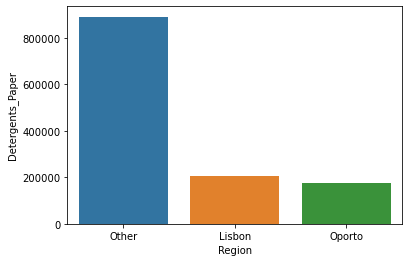

In [48]:

sns.barplot(x='Region',y='Detergents_Paper',ci=False,estimator=sum,data=df)


<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

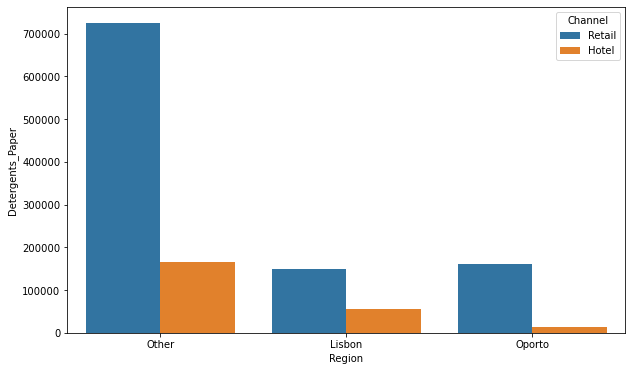

In [49]:

plt.figure(figsize=(10,6));
sns.barplot(x='Region',y='Detergents_Paper',hue='Channel',ci=False,estimator=sum,data=df)

In [50]:
df_des=df.groupby('Region').describe()['Delicatessen'].T
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des



Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,1354.896104,1159.702128,1620.601266
std,1345.423340,1050.739841,3232.581660
min,7.000000,51.000000,3.000000
25%,548.000000,540.500000,402.000000
50%,806.000000,898.000000,994.000000
75%,1775.000000,1538.500000,1832.750000
max,6854.000000,5609.000000,47943.000000
CV,0.993008,0.906043,1.994680


<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

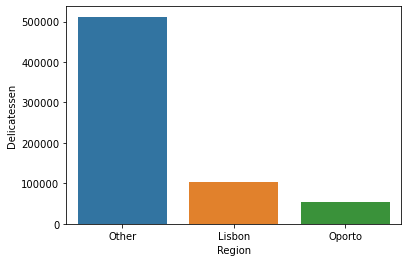

In [51]:
sns.barplot(x='Region',y='Delicatessen',ci=False,estimator=sum,data=df)



<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

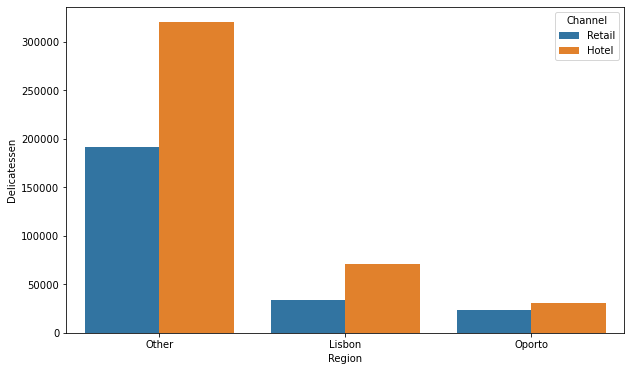

In [52]:
plt.figure(figsize=(10,6));
sns.barplot(x='Region',y='Delicatessen',hue='Channel',ci=False,estimator=sum,data=df)

In [53]:
df[feature].skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items show the least inconsistent behaviour?

In [54]:
df_des=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe()
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


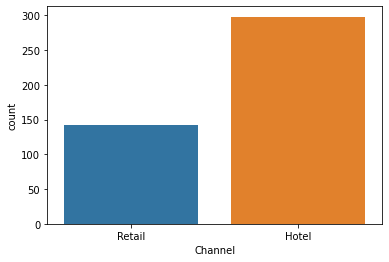

In [55]:
sns.countplot(x='Channel',data=df);

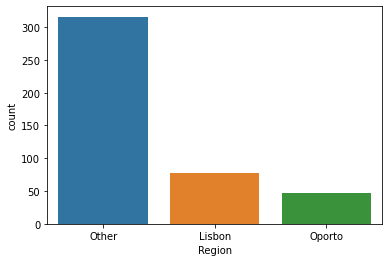

In [56]:
sns.countplot(x='Region',data=df);

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

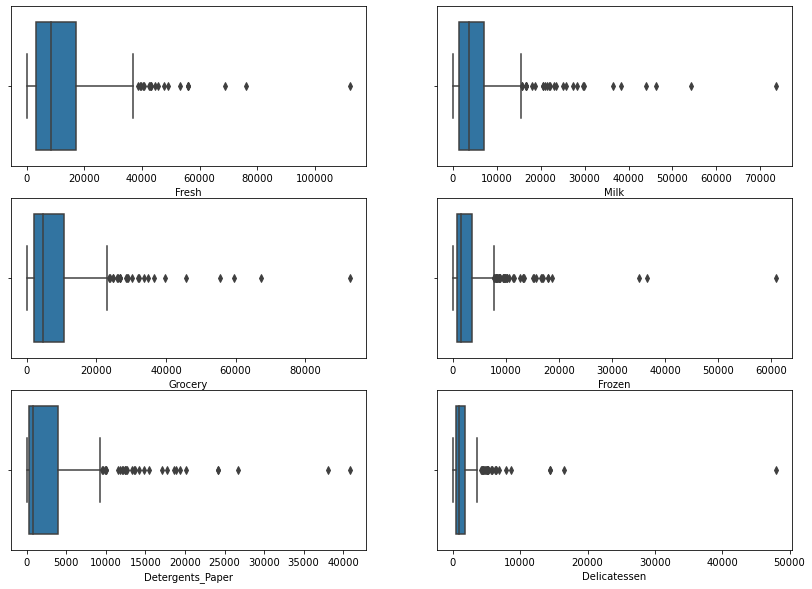

In [57]:
feature=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.figure(figsize=(14,10))
for i in feature:
    plt.subplot(3,2,feature.index(i)+1)
    sns.boxplot(df[i])

1.5 On the basis of your analysis, what are your recommendations for the business?
How can your analysis help the business to solve its problem? Answer from the business perspective

Ans. Please follow on business report.

# Problem -2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate
students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses
from 62 undergraduates (stored in the Survey data set).

In [3]:
data=pd.read_csv('Survey-1.csv')
data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [5]:
data.isnull().values.any()

False

In [6]:
print("rows",data.shape[0],"columns",data.shape[1])

rows 62 columns 14


In [7]:
print("Total number of elements of dataset =",data.shape[0]*data.shape[1])

Total number of elements of dataset = 868


In [8]:
data.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [9]:
data.describe(include=object)

,Gender,Class,Major,Grad Intention,Employment,Computer
count,62,62,62,62,62,62
unique,2,3,8,3,3,3
top,Female,Senior,Retailing/Marketing,Yes,Part-Time,Laptop
freq,33,31,14,28,43,55


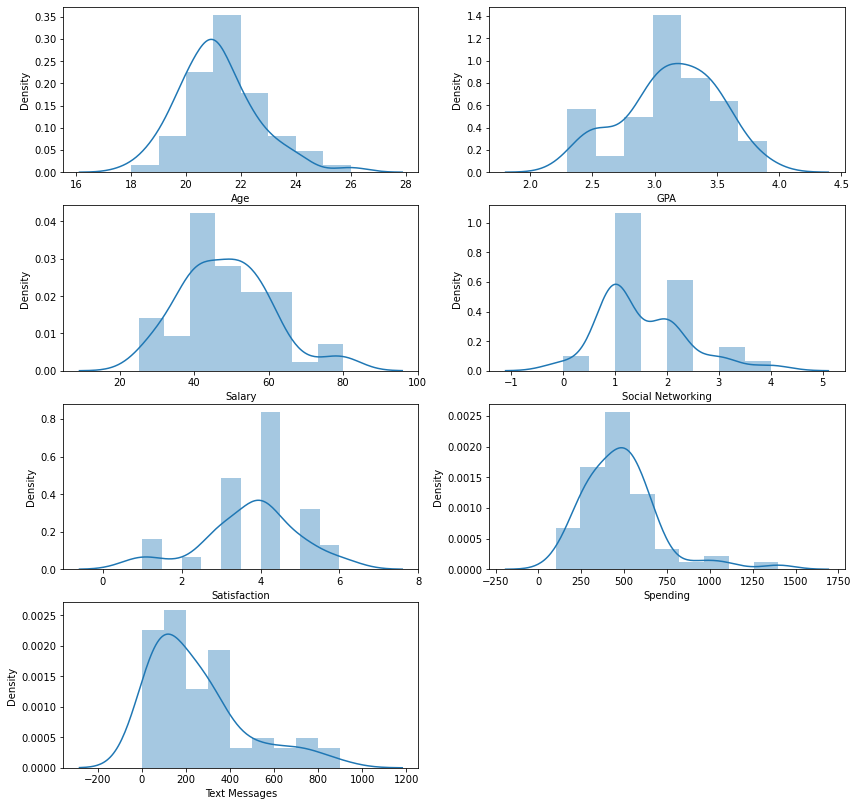

In [10]:
feature=['Age','GPA','Salary','Social Networking','Satisfaction','Spending','Text Messages']
plt.figure(figsize=(14,14))
for i in feature:
    plt.subplot(4,2,feature.index(i)+1)
    sns.distplot(data[i])

In [11]:
data[feature].skew()

Age                  0.736533
GPA                 -0.314600
Salary               0.534701
Social Networking    0.961056
Satisfaction        -0.505437
Spending             1.585915
Text Messages        1.295808
dtype: float64

<AxesSubplot:>

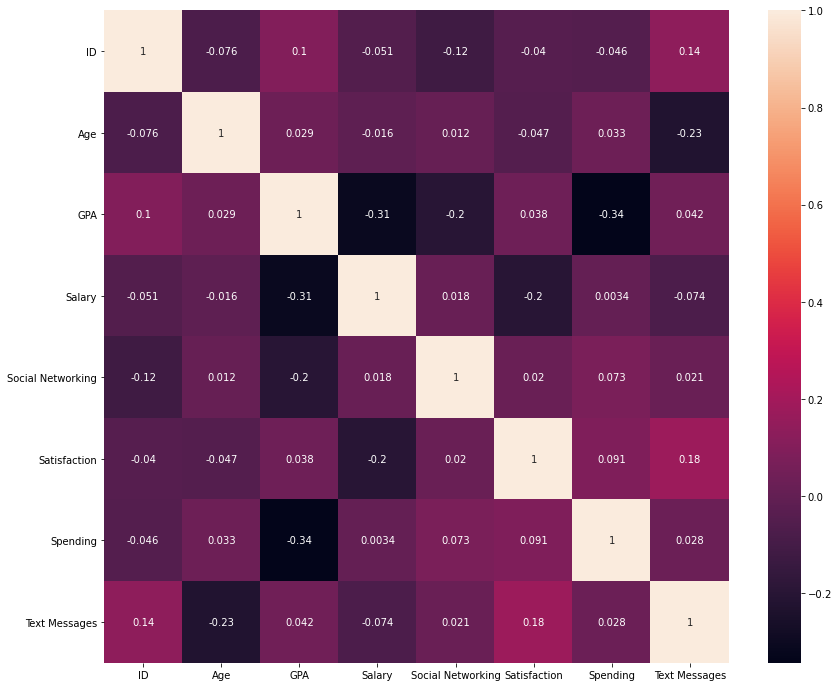

In [12]:
plt.figure(figsize=(14,12),)
sns.heatmap(data.corr(), annot=True)

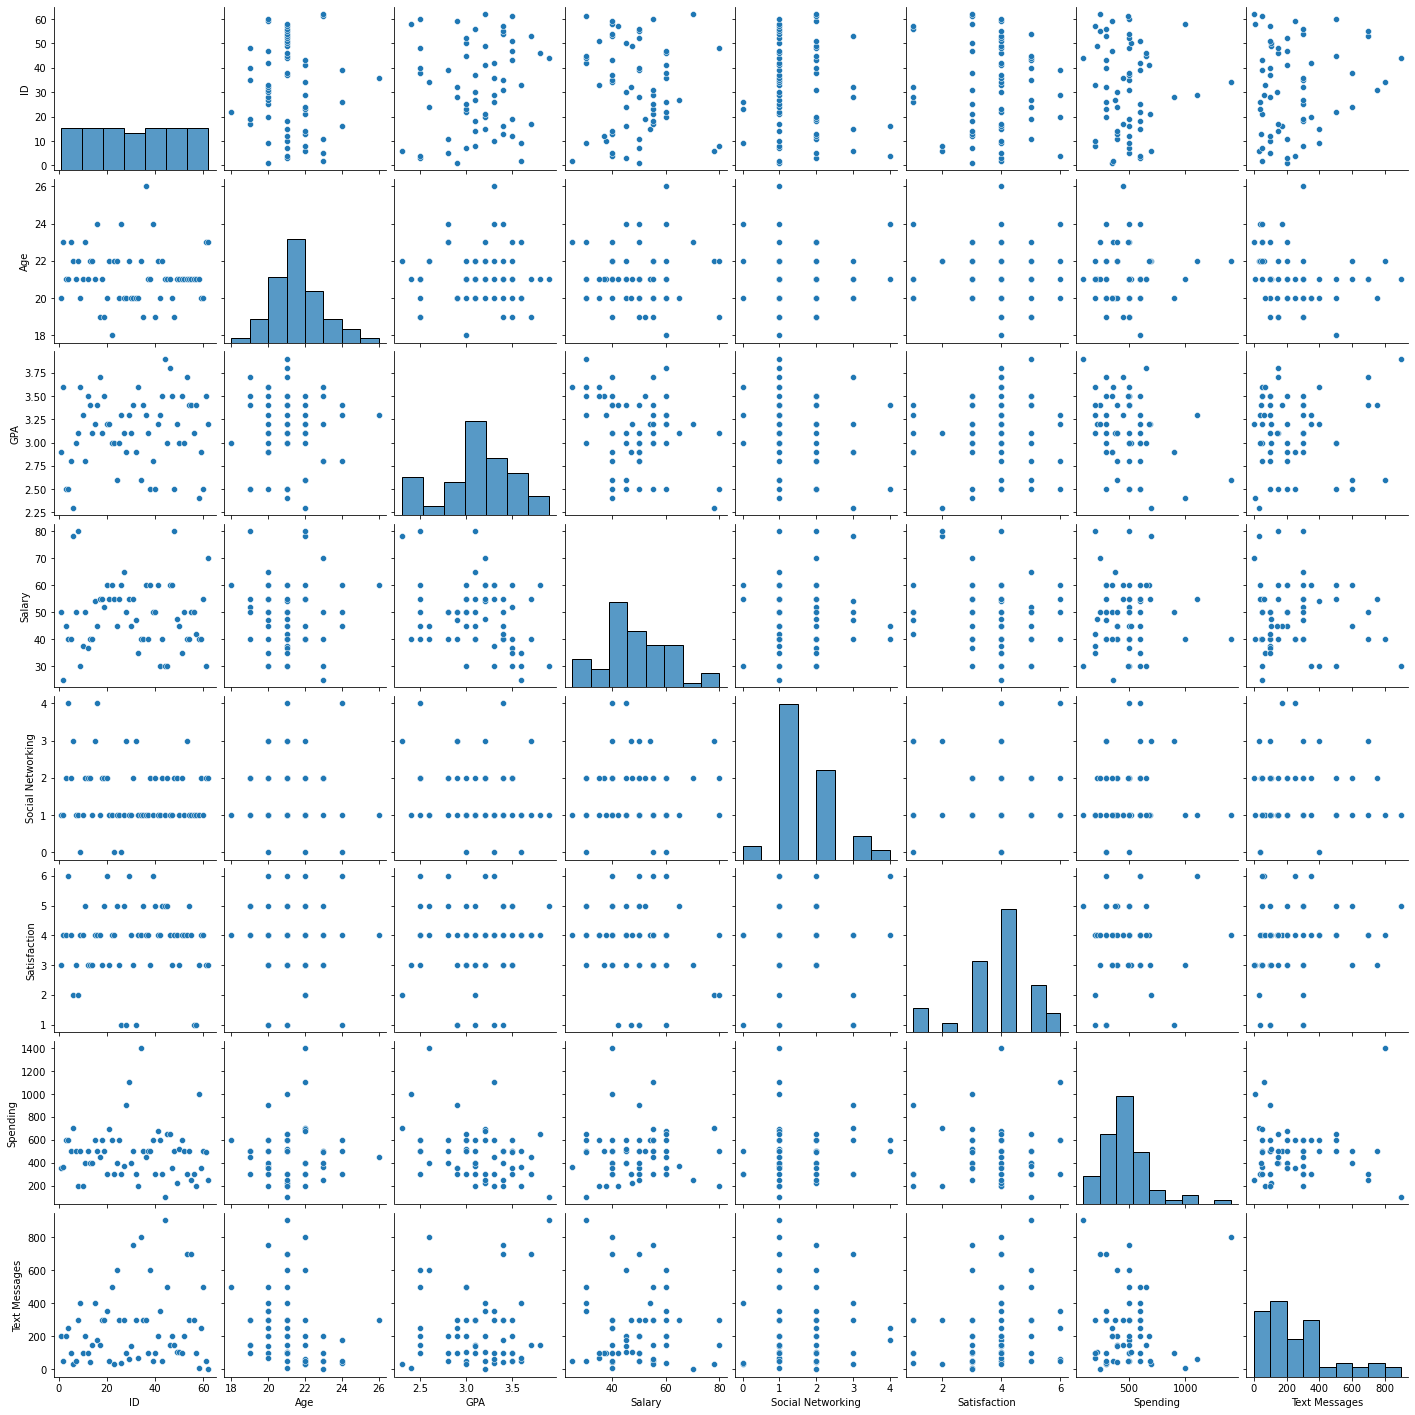

In [13]:
sns.pairplot(data)

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [14]:
pd.crosstab(data['Gender'],data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [15]:
pd.crosstab(data['Gender'],data['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [16]:
pd.crosstab(data['Gender'],data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [17]:
pd.crosstab(data['Gender'],data['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [18]:
data.groupby('Gender').size()

Gender
Female    33
Male      29
dtype: int64

In [19]:
print('the probability that a randomly selected CMSU student will be male ',29/62)

the probability that a randomly selected CMSU student will be male  0.46774193548387094


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [20]:
print('the probability that a randomly selected CMSU student will be female',33/62)

the probability that a randomly selected CMSU student will be female 0.532258064516129


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [21]:
Prob_data=pd.crosstab(data['Major'],data['Gender'])
Prob_data['probability']=Prob_data['Male']/29
Prob_data

Gender,Female,Male,probability
Major,,,
Accounting,3,4,0.137931
CIS,3,1,0.034483
Economics/Finance,7,4,0.137931
International Business,4,2,0.068966
Management,4,6,0.206897
Other,3,4,0.137931
Retailing/Marketing,9,5,0.172414
Undecided,0,3,0.103448


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [22]:
Prob_data['probability']=Prob_data['Female']/33
Prob_data

Gender,Female,Male,probability
Major,,,
Accounting,3,4,0.090909
CIS,3,1,0.090909
Economics/Finance,7,4,0.212121
International Business,4,2,0.121212
Management,4,6,0.121212
Other,3,4,0.090909
Retailing/Marketing,9,5,0.272727
Undecided,0,3,0.000000


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [23]:
pd.crosstab(data['Gender'],data['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [24]:
print('probability That a randomly chosen student is a male and intends to graduate.',17/62)

probability That a randomly chosen student is a male and intends to graduate. 0.27419354838709675


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [25]:
pd.crosstab(data['Gender'],data['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [26]:
print("the probability that a randomly selected student is a female and does NOT have a laptop.",(4/62))

the probability that a randomly selected student is a female and does NOT have a laptop. 0.06451612903225806


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [82]:
pd.crosstab(data['Gender'],data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [83]:
print("the probability that a randomly chosen student is a male or has full-time employment",(29/62)+(10/62)-(7/62))

the probability that a randomly chosen student is a male or has full-time employment 0.5161290322580645


2.5.2. Find the conditional probability that given a female student is randomly chosen,
she is majoring in international business or management.

In [84]:
pd.crosstab(data['Gender'],data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [85]:
print('the conditional probability that given a female student is randomly chosen, she is majoring in international business or management',8/33)

the conditional probability that given a female student is randomly chosen, she is majoring in international business or management 0.24242424242424243


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not
considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [86]:
pd.crosstab(data['Gender'],data['Grad Intention']).drop(['Undecided'],axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [87]:
data[data['GPA'] <3].count()

ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad Intention       17
GPA                  17
Employment           17
Salary               17
Social Networking    17
Satisfaction         17
Spending             17
Computer             17
Text Messages        17
dtype: int64

In [88]:
print("a student is chosen randomly, what is the probability that his/her GPA is less than 3 =  ",17/62)

a student is chosen randomly, what is the probability that his/her GPA is less than 3 =   0.27419354838709675


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability
that a randomly selected female earns 50 or more.

In [89]:
pd.crosstab(data['Gender'],data['Salary'] >=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [90]:
print("Find the conditional probability that a randomly selected male earns 50 or more",14/29)
print("Find the conditional probability that a randomly selected female earns 50 or more",18/33)

Find the conditional probability that a randomly selected male earns 50 or more 0.4827586206896552
Find the conditional probability that a randomly selected female earns 50 or more 0.5454545454545454


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

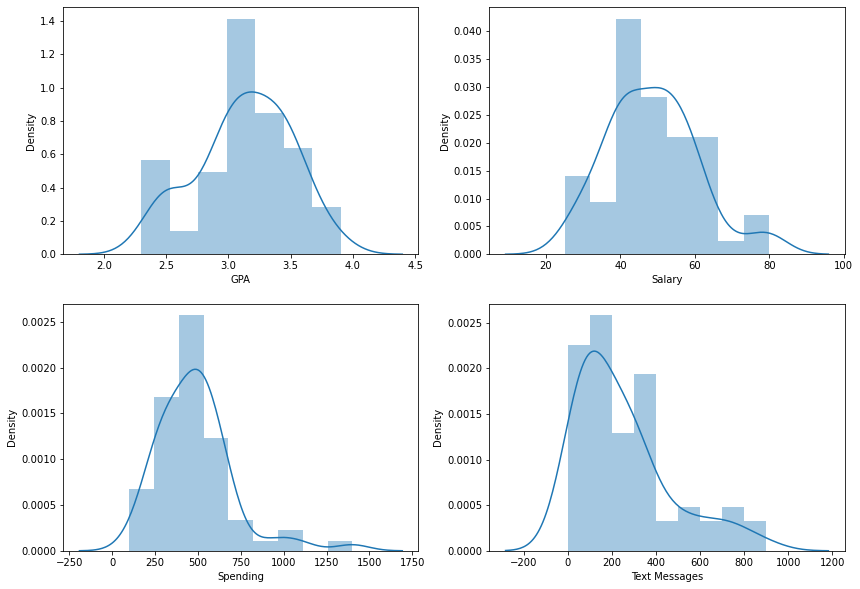

In [91]:
feature=['GPA','Salary','Spending','Text Messages']
plt.figure(figsize=(14,10))
for i in feature:
    plt.subplot(2,2,feature.index(i)+1)
    sns.distplot(data[i])

In [92]:
data[feature].skew()

GPA             -0.314600
Salary           0.534701
Spending         1.585915
Text Messages    1.295808
dtype: float64

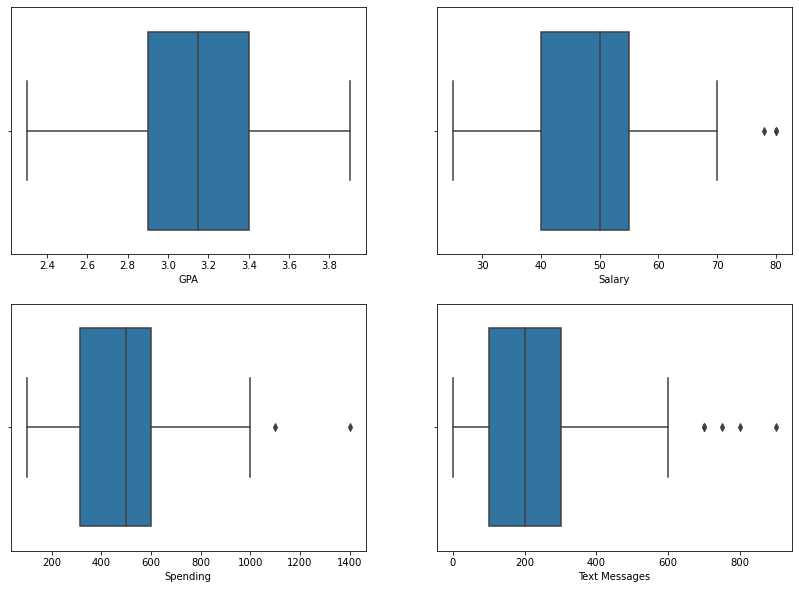

In [93]:
feature=['GPA','Salary','Spending','Text Messages']
plt.figure(figsize=(14,10))
for i in feature:
    plt.subplot(2,2,feature.index(i)+1)
    sns.boxplot(data[i])

In [94]:
data[feature].describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


 Normality of data
 shapiro Test (shapiro wilk test of normality)
 Ho : Data is normally distributed
 H1 : Data is not normally distributed

In [95]:
stats.shapiro(data['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [96]:
stats.shapiro(data['Salary'])

ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)

In [97]:
stats.shapiro(data['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [98]:
stats.shapiro(data['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

# Problem-3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [103]:
df=pd.read_csv('A+&+B+shingles.csv')
df

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [104]:
df.isnull().values.any()

True

In [105]:
df.isnull().sum()

A    0
B    5
dtype: int64

There are 5 missing values

In [106]:
df.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


<AxesSubplot:xlabel='A', ylabel='Density'>

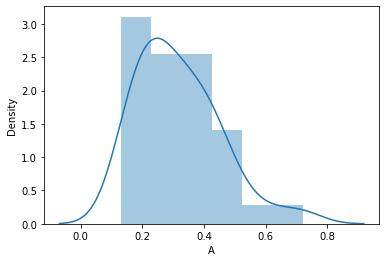

In [107]:
sns.distplot(df['A'])

<AxesSubplot:xlabel='B', ylabel='Density'>

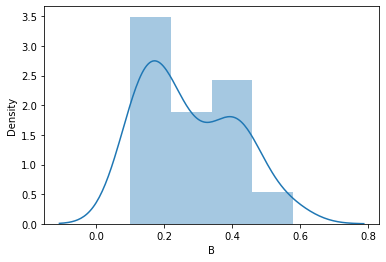

In [108]:
sns.distplot(df['B'])

In [109]:
df.skew()

A    0.950619
B    0.513424
dtype: float64

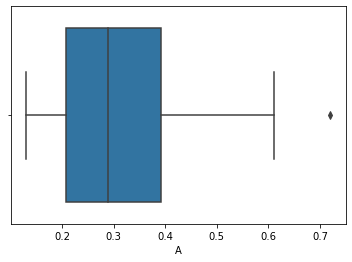

In [110]:
sns.boxplot(df['A']);

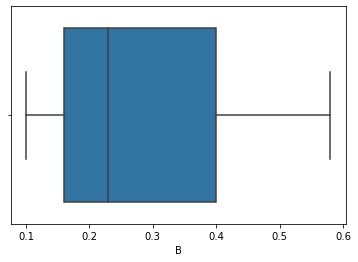

In [111]:
sns.boxplot(df['B']);

# As per CLT Assumption we can assume that data is normally distributed

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [ ]:
# H0 : mean moisture content <=0.35
# HA : mean moisture content > 0.35
# One Tail test

In [112]:
st,pvalue=stats.ttest_1samp(df['A'],0.35)

In [113]:
pvalue/2

0.07477633144907513

In this scenario the p value is 0.07477633144907513 is greater than 0.05, Hence accept the null hypothesis that population mean moisture for shingles A less than

In [114]:
df1=df.dropna()
df1

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [115]:
df1.isnull().values.any()

False

In [ ]:
# H0 : mean moisture content <=0.35
# HA : mean moisture content > 0.35
# One Tail test

In [116]:
st,pvalue=stats.ttest_1samp(df1['B'],0.35)

In [117]:
pvalue/2

0.0020904774003191813

In this scenario the p value is 0.0020904774003191813 is less than 0.05, Hence reject the null hypothesis that population mean moisture content for shingles B greater than

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [118]:
df

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [ ]:
# H0 : mu(A) = mu(B)
# Ha : mu(A) != mu(B)
# Two Tail test

In [119]:
stats.ttest_ind(df['A'],df['B'],nan_policy = 'omit',alternative='two-sided')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

In this scenario the p value is 0.2017496571835306 is greater than 0.05, Hence accept the null hypothesis.

# Thanks